In [ ]:
!pip install influxdb


In [ ]:
import influxdb

In [ ]:
HOST = 'influx.linklab.virginia.edu'
PORT = 443
USERNAME = 'cps1f23'
PASSWORD = 'phah7goohohng5ooL9mae1quohpei1Ahsh1uGing'
DATABASE = 'gateway-generic'


client = influxdb.InfluxDBClient(HOST, PORT, USERNAME, PASSWORD, DATABASE, ssl=True, verify_ssl=True)

In [ ]:
pir_data = client.query("SELECT max(value) FROM \"PIR Status\" WHERE time >= '2024-11-11T00:00:00Z' AND time <= '2024-11-18T00:00:00Z' AND location_specific = '241 Olsson' GROUP BY time(10m),device_id,location_specific")

In [ ]:
import pandas as pd
pir_df = pd.DataFrame(columns=['time','pir','device_id','location_specific'])

n = 0
for i in pir_data:
  for j in i:
    newLine = pd.DataFrame({'time':[j['time']],
                            'pir':[j['max']],
                            'device_id':[pir_data.keys()[n][1]['device_id']],
                            'location_specific':[pir_data.keys()[n][1]['location_specific']]})
    pir_df = pd.concat([pir_df, newLine],ignore_index=True)
  n += 1

<ipython-input-5-bdfd12e71525>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pir_df = pd.concat([pir_df, newLine],ignore_index=True)


In [ ]:
pir_df['pir'] = pir_df['pir'].ffill()

In [ ]:
pir_df.dropna(inplace=True)

In [ ]:
pir_df

,time,pir,device_id,location_specific
101,2024-11-11T16:50:00Z,255.0,00888e93,241 Olsson
102,2024-11-11T17:00:00Z,255.0,00888e93,241 Olsson
103,2024-11-11T17:10:00Z,255.0,00888e93,241 Olsson
104,2024-11-11T17:20:00Z,255.0,00888e93,241 Olsson
105,2024-11-11T17:30:00Z,0.0,00888e93,241 Olsson
...,...,...,...,...
2013,2024-11-17T23:20:00Z,0.0,050d69ce,241 Olsson
2014,2024-11-17T23:30:00Z,0.0,050d69ce,241 Olsson
2015,2024-11-17T23:40:00Z,0.0,050d69ce,241 Olsson
2016,2024-11-17T23:50:00Z,0.0,050d69ce,241 Olsson


In [ ]:
co2_data = client.query("SELECT mean(value) FROM \"co2_ppm\" WHERE time >= '2024-11-11T16:50:00Z' AND time <= '2024-11-18T00:00:00Z' AND location_specific = '241 Olsson' GROUP BY time(10m),device_id,location_specific")

In [ ]:
co2_df = pd.DataFrame(columns=['time','co2','device_id','location_specific'])

n = 0
for i in co2_data:
  for j in i:
    newLine = pd.DataFrame({'time':[j['time']],
                            'co2':[j['mean']],
                            'device_id':[co2_data.keys()[n][1]['device_id']],
                            'location_specific':[co2_data.keys()[n][1]['location_specific']]})
    co2_df = pd.concat([co2_df, newLine],ignore_index=True)
  n += 1

<ipython-input-10-143f6800b864>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  co2_df = pd.concat([co2_df, newLine],ignore_index=True)


In [ ]:
co2_df['co2'] = co2_df['co2'].ffill()

In [ ]:
co2_df.isna().sum().sum()

0

In [ ]:
co2_df

,time,co2,device_id,location_specific
0,2024-11-11T16:50:00Z,458.333333,70886b123039,241 Olsson
1,2024-11-11T17:00:00Z,514.966102,70886b123039,241 Olsson
2,2024-11-11T17:10:00Z,531.416667,70886b123039,241 Olsson
3,2024-11-11T17:20:00Z,543.583333,70886b123039,241 Olsson
4,2024-11-11T17:30:00Z,516.254237,70886b123039,241 Olsson
...,...,...,...,...
903,2024-11-17T23:20:00Z,442.250000,70886b123039,241 Olsson
904,2024-11-17T23:30:00Z,441.950000,70886b123039,241 Olsson
905,2024-11-17T23:40:00Z,443.800000,70886b123039,241 Olsson
906,2024-11-17T23:50:00Z,443.716667,70886b123039,241 Olsson


In [ ]:
pir_df['pir'] = pir_df['pir'].replace(1, 0) # replace 1 with 0

In [ ]:
pir_df['pir'] = pir_df['pir'].replace(253, 255) #replace 253 with 255

In [ ]:
#Replacing 255 with 1. 1- Occupancy/Motion
pir_df['pir'] = pir_df['pir'].replace(255, 1)

In [ ]:
pir_df['pir'].unique()

array([1., 0.])

In [ ]:
pir_df.reset_index(drop=True, inplace=True)

In [ ]:
pir_df

,time,pir,device_id,location_specific
0,2024-11-11T16:50:00Z,1.0,00888e93,241 Olsson
1,2024-11-11T17:00:00Z,1.0,00888e93,241 Olsson
2,2024-11-11T17:10:00Z,1.0,00888e93,241 Olsson
3,2024-11-11T17:20:00Z,1.0,00888e93,241 Olsson
4,2024-11-11T17:30:00Z,0.0,00888e93,241 Olsson
...,...,...,...,...
1912,2024-11-17T23:20:00Z,0.0,050d69ce,241 Olsson
1913,2024-11-17T23:30:00Z,0.0,050d69ce,241 Olsson
1914,2024-11-17T23:40:00Z,0.0,050d69ce,241 Olsson
1915,2024-11-17T23:50:00Z,0.0,050d69ce,241 Olsson


In [ ]:
full_df = pd.merge(pir_df, co2_df, on=['time','location_specific'])

In [ ]:
full_df

,time,pir,device_id_x,location_specific,co2,device_id_y
0,2024-11-11T16:50:00Z,1.0,00888e93,241 Olsson,458.333333,70886b123039
1,2024-11-11T17:00:00Z,1.0,00888e93,241 Olsson,514.966102,70886b123039
2,2024-11-11T17:10:00Z,1.0,00888e93,241 Olsson,531.416667,70886b123039
3,2024-11-11T17:20:00Z,1.0,00888e93,241 Olsson,543.583333,70886b123039
4,2024-11-11T17:30:00Z,0.0,00888e93,241 Olsson,516.254237,70886b123039
...,...,...,...,...,...,...
1811,2024-11-17T23:20:00Z,0.0,050d69ce,241 Olsson,442.250000,70886b123039
1812,2024-11-17T23:30:00Z,0.0,050d69ce,241 Olsson,441.950000,70886b123039
1813,2024-11-17T23:40:00Z,0.0,050d69ce,241 Olsson,443.800000,70886b123039
1814,2024-11-17T23:50:00Z,0.0,050d69ce,241 Olsson,443.716667,70886b123039


In [ ]:
import calendar
from copy import deepcopy
import csv
import datetime
import os

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


import matplotlib
import matplotlib.pyplot as plt

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from pylab import rcParams

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats

import seaborn as sns

import pytz

In [ ]:
# K-means with 2 clusters
def apply_kmeans(data, num_clusters=2):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    return kmeans, labels

def graph_k_means(data, data_type, kmeans, labels):
  centroids = kmeans.cluster_centers_
  occupied_label = np.argmax(centroids)  # Index of the higher centroid
  binary_labels = np.where(labels == occupied_label, 1, 0)

  time = np.arange(len(data))

  plt.figure(figsize=(10, 6))
  plt.scatter(time, data, c=labels, cmap='viridis', marker='o', alpha=0.6)
  plt.xlabel('Time')
  plt.ylabel(f'{data_type} Levels')
  plt.title(f'K-means Clustering of {data_type} Levels Over Time')
  plt.colorbar(label='Cluster')
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.hist(data[labels == 0], bins=30, alpha=0.6, label='Cluster 0')
  plt.hist(data[labels == 1], bins=30, alpha=0.6, label='Cluster 1')
  plt.xlabel(f'{data_type} Levels')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {data_type} Levels by Cluster')
  plt.legend()
  plt.show()

In [ ]:
co2_data = full_df['co2']
co2_data = full_df[["co2"]].values.astype('float32')

In [ ]:
scaler = StandardScaler()
co2_data = scaler.fit_transform(co2_data)

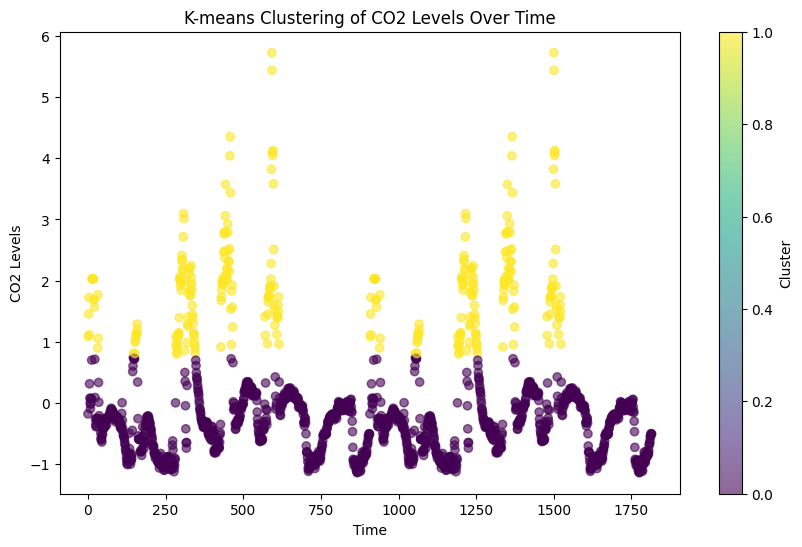

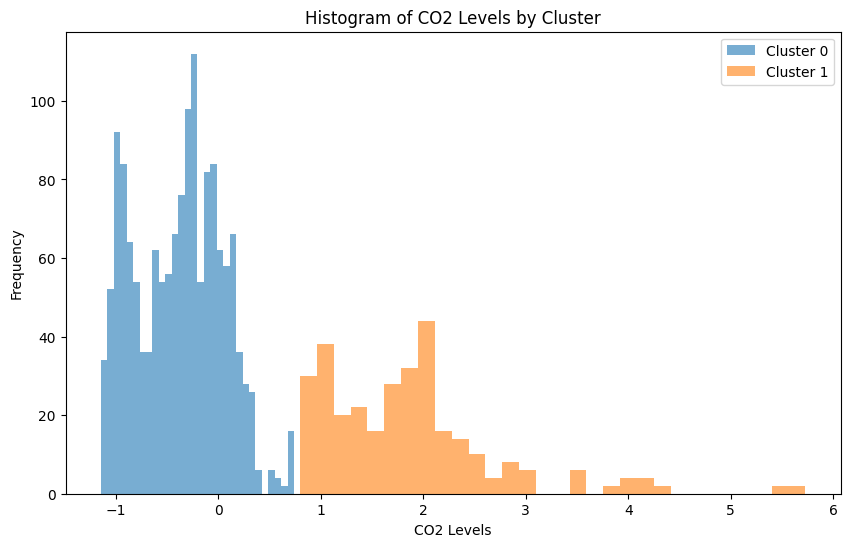

In [ ]:
kmeans, binary_labels = apply_kmeans(co2_data, num_clusters=2)
graph_k_means(co2_data, "CO2", kmeans, binary_labels)

In [ ]:
binary_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(full_df['pir'], binary_labels)

0.9509911894273128

In [ ]:
full_df['co2_cluster'] = binary_labels

In [ ]:
full_df.to_csv('full_df.csv', index=False)

In [ ]:
full_df["time"] = pd.to_datetime(full_df['time'])

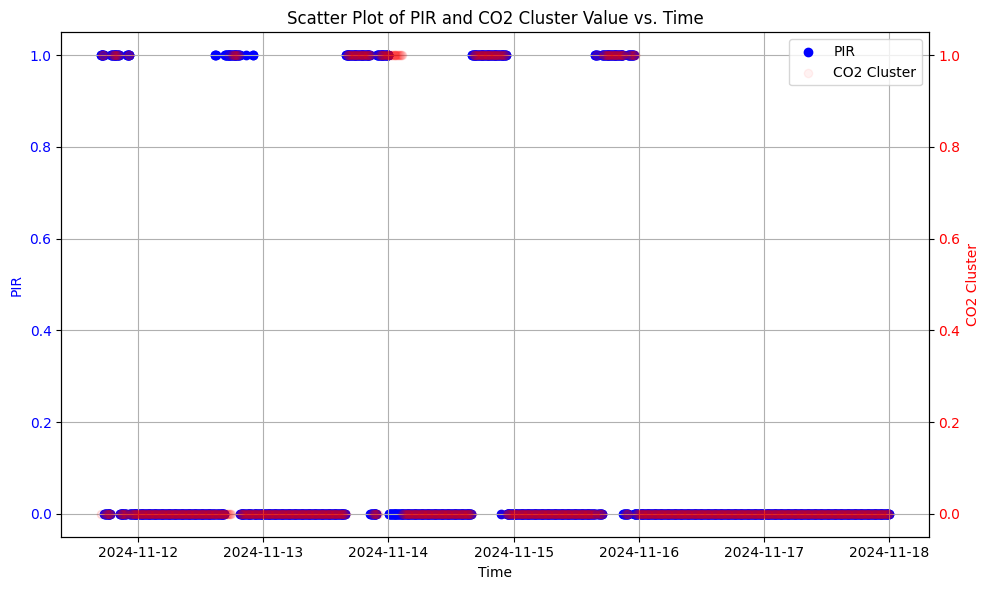

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PIR data on the left y-axis
pir_plot = ax1.scatter(full_df["time"], full_df["pir"], label='PIR', color='blue', marker='o')
ax1.set_xlabel("Time")
ax1.set_ylabel("PIR", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Scatter Plot of PIR and CO2 Cluster Value vs. Time")
ax1.grid(True)

# Create a twin y-axis for CO2 cluster
ax2 = ax1.twinx()
co2_plot = ax2.scatter(full_df["time"], full_df["co2_cluster"], label='CO2 Cluster', color='red', marker='o', alpha=0.05)
ax2.set_ylabel("CO2 Cluster", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
plots = [pir_plot, co2_plot]
labels = [p.get_label() for p in plots]
ax1.legend(plots, labels, loc='upper right')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


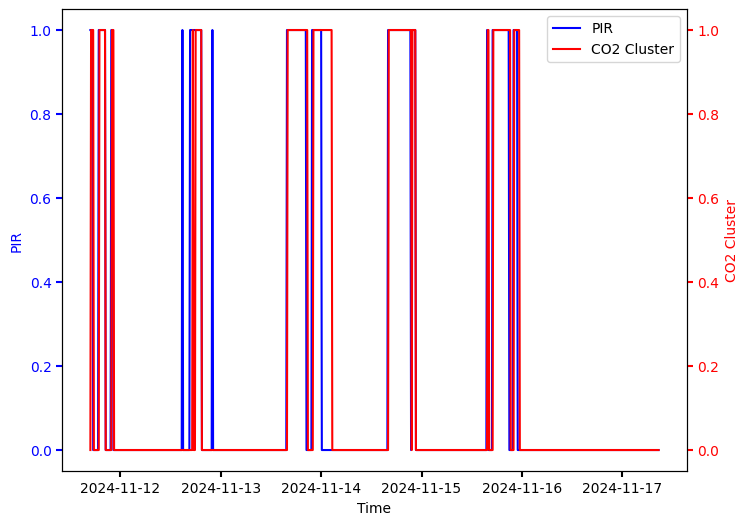

In [ ]:
x1 = full_df["time"][:-1000]
y1 = full_df["pir"][:-1000]
x2 = full_df["time"][:-1000]
y2 = full_df["co2_cluster"][:-1000]

fig, ax = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()


p1, = ax.plot(x1, y1, "b-", label="PIR")
p2, = twin1.plot(x2, y2, "r-", label="CO2 Cluster")

#ax.set_xlim(0, 2)
#ax.set_ylim(0, 2)
#twin1.set_ylim(0, 4)

ax.set_xlabel("Time")
ax.set_ylabel("PIR")
twin1.set_ylabel("CO2 Cluster")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2])

plt.show()

In [ ]:
# separate out the pir and co2 cluster arrays, and in the pir array add 0 in the beginning and
# remove the last element and calculate the difference between pir and co2 cluster and print it,
# do this for adding 2 0's in the beginning and removing the last 2 elements and do like this until 10 iterations

import pandas as pd
import matplotlib.pyplot as plt


pir_array = full_df["pir"].values
co2_array = full_df["co2_cluster"].values

for i in range(0,10):
  # Add zeros to the beginning of pir_array
  temp_pir_array = list(pir_array)
  temp_pir_array = [0] * (i + 1) + temp_pir_array

  # Remove elements from the end of pir_array and co2_array
  temp_pir_array = temp_pir_array[:len(temp_pir_array) - (i + 1)]
  temp_co2_array = co2_array

  diff = np.array(temp_pir_array) - np.array(temp_co2_array)

  print(f"Iteration {i+1}:")
  print("Difference between pir and co2 cluster:", diff)

  print(sum(abs(diff)))


Iteration 1:
Difference between pir and co2 cluster: [0. 0. 0. ... 0. 0. 0.]
65.0
Iteration 2:
Difference between pir and co2 cluster: [ 0. -1.  0. ...  0.  0.  0.]
87.0
Iteration 3:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
117.0
Iteration 4:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
145.0
Iteration 5:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
173.0
Iteration 6:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
191.0
Iteration 7:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
205.0
Iteration 8:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
217.0
Iteration 9:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
231.0
Iteration 10:
Difference between pir and co2 cluster: [ 0. -1. -1. ...  0.  0.  0.]
237.0
